
# MRFM_BrownianFit h5 Tests
last updated 01/20/2026 KLB

## Using this notebook

TBD

## Preliminaries

### import libraries

In [1]:
from MRFM_BrownianFit.LabVIEW_int import LVprocessing
import h5py
import os
from MRFM_BrownianFit.MCMC import MCMC

### read in the data from an h5 file 

(32 averages from 09/24/2025)


In [2]:
# read h5 file for average power spectrum

file = h5py.File(r'brownian_k_20250924_145412_.h5', 'r')

temp = float(file['temp'][()])
n_avgs = int(file['n_avgs'][()])
freq = file['x'][:]
power = file['y'][:]

# check that data is read as expected
print( len(freq), freq.shape)
print(temp, n_avgs)

#clean up
del file


2000 (2000,)
294.5 32


## Run fit using MRFM_BrownianFit

### Use LVprocessing to initialize brownian_fit class

In [3]:
# set path to folder for saved plots and reports
current_dir = os.getcwd()
path = os.path.join(current_dir,"example_outputs")
del current_dir

# set root name for plots and reports
name="brownian_example_20250924"

#call LVprocessing class
data = LVprocessing(n_avgs, temp, list(freq), list(power), name=name, path=path)


### do_fit()

c:\Users\Katri\miniconda3\envs\mrfm_emcee\lib\site-packages\uncertainties\core.py:1024: UserWarning: Using UFloat objects with std_dev==0 may give unexpected results.
  warn("Using UFloat objects with std_dev==0 may give unexpected results.")


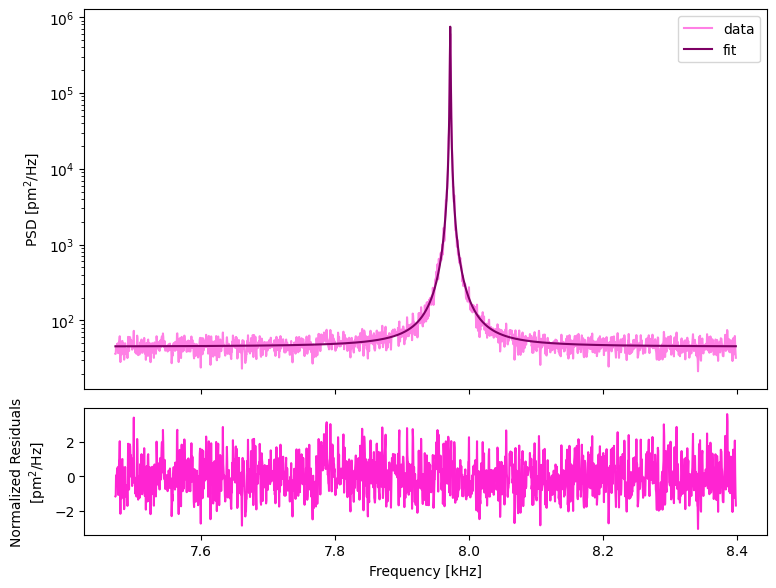

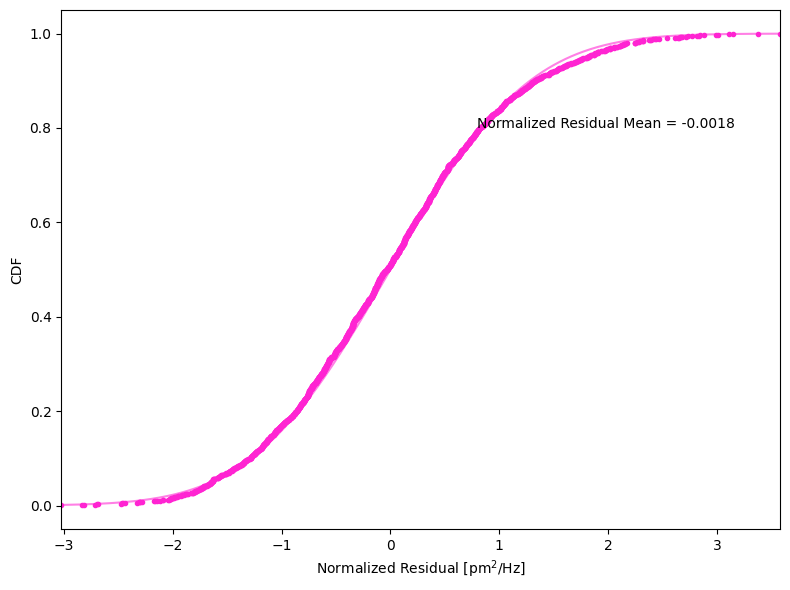

In [4]:
# run fitting function - this example will not generate the .tex report
data.do_fit()

# use brownian_fit functions to generate the fit plot and the residuals cdf
data.fit.plot_fit()
data.fit.residuals_CDF()

# print the fit summary
data.fit.result["leastsq"]

### plot_report()

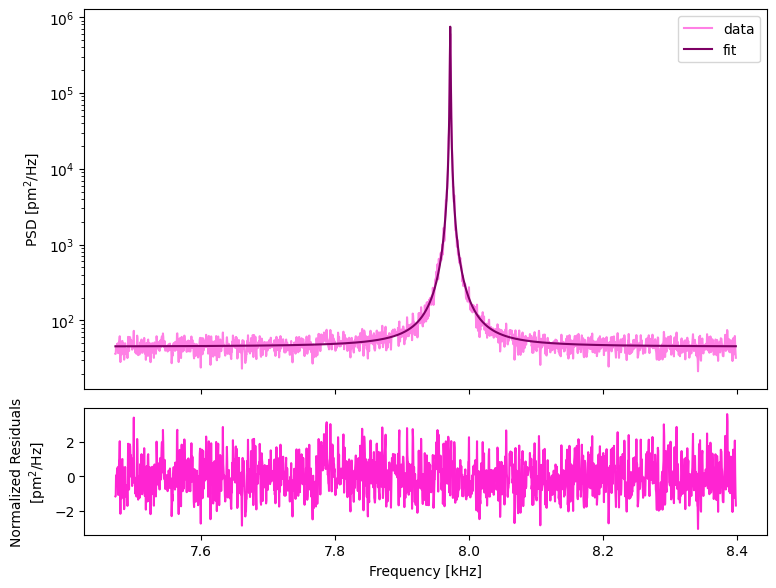

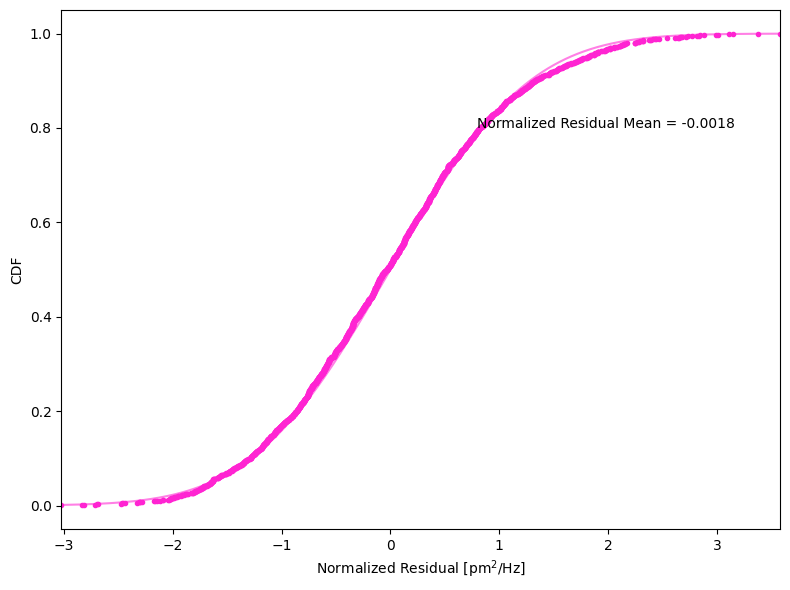

In [5]:
# run fitting function - this example will generate the .tex report
data.plot_report()

# print the fit summary
data.fit.result["leastsq"]

## Use Bayesian methods to explore parameter distributions

### Maximum Log Likelihood Estimates

In [6]:
# find maximum log likelihood estimate
data.fit.max_likelihood()

print(data.fit.bayesian_result)

{'Gamma': 8.70705753052341e-12, 'tau0': 398.57225749259123, 'f0': 7.97248522442648, 'baseline': 45.154683158174436, 'message': 'Optimization terminated successfully.'}


### MCMC

Initializing class MCMC...
Auto error handling is turned on, error correcting steps will be run. This can be turned off by setting self.ErrorHandling to False
Running emcee sampler...


  0%|          | 0/2000 [00:00<?, ?it/s]

100%|██████████| 2000/2000 [00:11<00:00, 177.52it/s]


Plotting walkers...


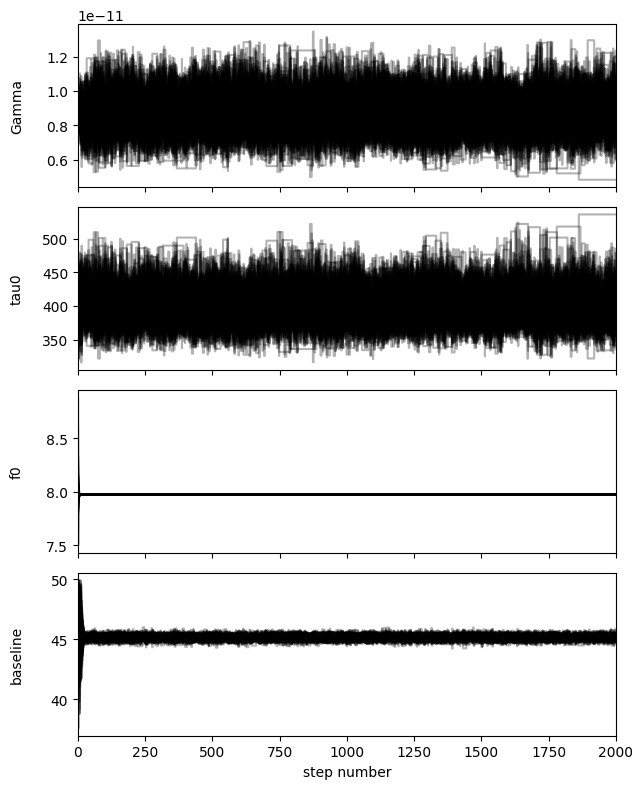

Calculating autocorrelation times...
[ 9.1378713  10.14350036  2.16455887  5.19642476]
Flattening samples...
Generating corner plots...
Calculating 95% credible intervals...
Gamma [N s/m]: [6.256e-12, 1.139e-11]
tau0 [ms]: [3.473e+02, 4.719e+02]
f0 [kHz]: [7.9724e+00, 7.9725e+00]
baseline [nm^2/Hz]: [4.473e+01, 4.558e+01]
Done.


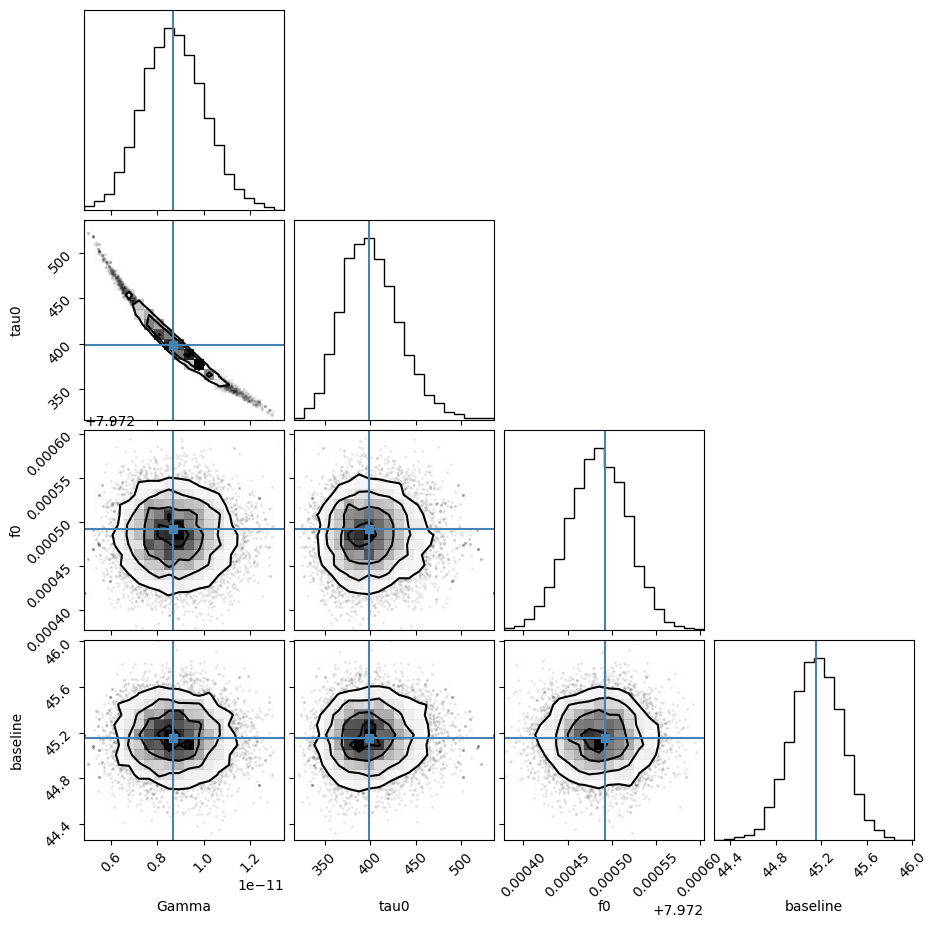

In [7]:
# define parameter bounds for Gamma, tau0, f0, and baseline - this will result in a uniform prior within these bounds
bounds = [(1e-16,1e-7),(1,5000),(4.5,11),(1,50)]

#initalize MCMC class
bayes_inf = MCMC(data.fit)

bayes_inf.run(param_bounds=bounds, n=95, figpath=path)

Other credible intervals: 68, 90

In [8]:
bayes_inf._credible_interval_68()

Calculating 68% credible intervals...
Gamma [N s/m]: [7.409e-12, 1.004e-11]
tau0 [ms]: [3.707e+02, 4.325e+02]
f0 [kHz]: [7.9725e+00, 7.9725e+00]
baseline [nm^2/Hz]: [4.494e+01, 4.538e+01]


In [9]:
bayes_inf._credible_interval_n(90)

Calculating 90% credible intervals...
Gamma [N s/m]: [6.598e-12, 1.093e-11]
tau0 [ms]: [3.546e+02, 4.574e+02]
f0 [kHz]: [7.9724e+00, 7.9725e+00]
baseline [nm^2/Hz]: [4.480e+01, 4.552e+01]


In [10]:
# if non int, should truncation to nearest int
bayes_inf._credible_interval_n(90.5)


n must be an integer. Truncating 90.5 to 90%.
Calculating 90% credible intervals...
Gamma [N s/m]: [6.598e-12, 1.093e-11]
tau0 [ms]: [3.546e+02, 4.574e+02]
f0 [kHz]: [7.9724e+00, 7.9725e+00]
baseline [nm^2/Hz]: [4.480e+01, 4.552e+01]


Tests for catching errors

Re-run sampler with 32 walkers

In [11]:
bayes_inf.walkers = 32
del bayes_inf.sampler
bayes_inf._run_walkers()

Running emcee sampler...


100%|██████████| 2000/2000 [00:09<00:00, 210.67it/s]


Generate corner plot without saving (will throw error if error handling is turned off)

Cannot generate corner plots without flattened sample array.
Auto handling error...
Calculating autocorrelation times...
[16.37156739 14.87982217  2.0797405   6.96940093]
Flattening samples...
Generating corner plots...


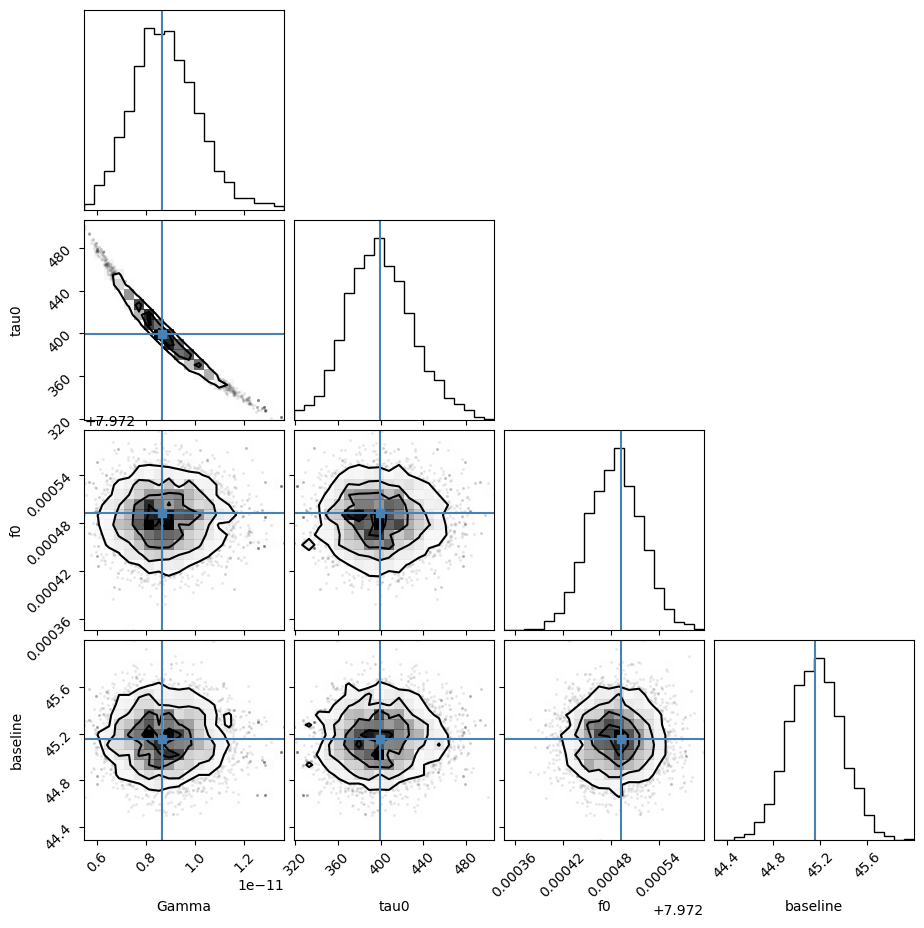

In [12]:
bayes_inf._gen_corner_plot(figpath=None)

Turn off error handling

In [13]:
bayes_inf.ErrorHandling = False

Rerun sampler with walkers = 64, nsteps = 4000

In [14]:
bayes_inf.walkers = 64
bayes_inf.nsteps = 4000
del bayes_inf.sampler
bayes_inf._run_walkers()

Running emcee sampler...


100%|██████████| 4000/4000 [00:23<00:00, 168.10it/s]


generate corner plot (will throw error)

Since error handling is off, use try except statement to allow rest of notebook to continue

In [15]:
try:
    bayes_inf._gen_corner_plot(figpath=None)
except RuntimeError as e:
    print(e)

Cannot generate corner plots without flattened sample array.
Failed to generate corner plot. Check that the sampler has been run and that the samples have been flattened


run flatten samples and confidence interval

Calculating autocorrelation times...
[9.17392011 9.3508886  2.64579679 4.32061405]
Flattening samples...
Generating corner plots...


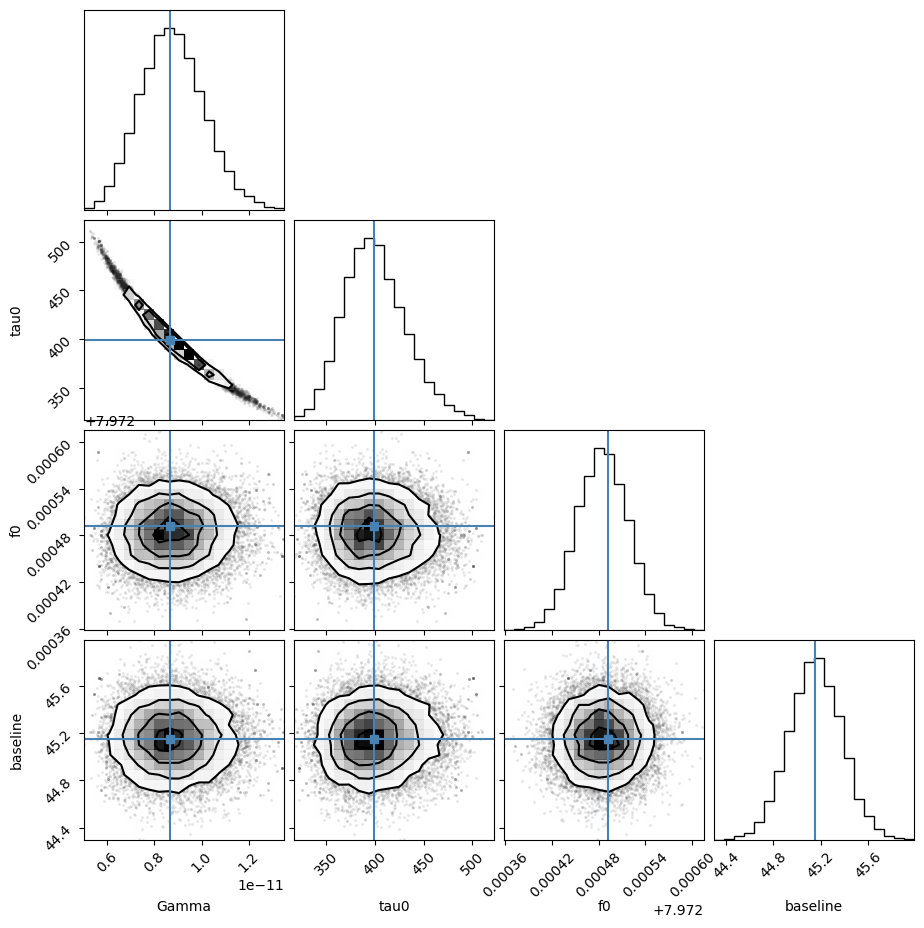

In [16]:
bayes_inf._flatten_samples()
bayes_inf._gen_corner_plot(figpath=None)

Change moves, reset progress var, turn on error handling, find 98.6% confidence interval (will truncate to 98%)

In [17]:
del bayes_inf.sampler
bayes_inf.moves = bayes_inf.emcee.moves.StretchMove()
bayes_inf.proc_prog = 0
bayes_inf.ErrorHandling = True
bayes_inf._credible_interval_n(n = 98.6)

Cannot calculate credible interval without flattened sample array.
Auto handling error...
Walkers must be run before samples can be flattened.
Auto handling error...
Running emcee sampler...


100%|██████████| 4000/4000 [00:14<00:00, 267.19it/s]


Calculating autocorrelation times...
Running emcee sampler...


  0%|          | 0/16000 [00:00<?, ?it/s]c:\Users\Katri\miniconda3\envs\mrfm_emcee\lib\site-packages\emcee\moves\red_blue.py:99: RuntimeWarning: invalid value encountered in scalar subtract
  lnpdiff = f + nlp - state.log_prob[j]
100%|██████████| 16000/16000 [01:07<00:00, 236.16it/s]


Calculating autocorrelation times...
[118.46172762 117.72383782  27.1788976   75.65101141]
Flattening samples...
n must be an integer. Truncating 98.6 to 98%.
Calculating 98% credible intervals...
Gamma [N s/m]: [5.908e-12, 1.683e-11]
tau0 [ms]: [3.378e+02, 4.862e+02]
f0 [kHz]: [7.9724e+00, 8.6210e+00]
baseline [nm^2/Hz]: [4.464e+01, 5.000e+01]
